<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/r%C3%A9gression_Lin%C3%A9aire_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Régression Linéaire Simple Numpy


In [13]:
import  numpy   as  np
from  sklearn.datasets  import  make_regression
import matplotlib.pyplot as plt


### 1.DataSet

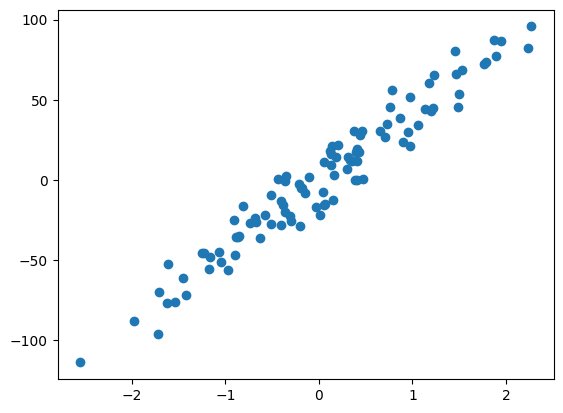

In [17]:
np.random.seed(0)
x,y=make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x, y)

In [18]:
np.random.seed(0)
y=y.reshape(y.shape[0],1)
x.shape

(100, 1)

In [19]:
y.shape

(100,)

In [22]:
np.random.seed(0)
y=y.reshape(y.shape[0],1)

In [24]:
y.shape

(100, 1)

In [29]:
X=np.hstack((x,np.ones(x.shape)))

In [36]:
X.shape

(100, 2)

In [40]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

### 2. Modele Linéaire

In [41]:
def  model(X,theta):
  return  X.dot(theta)


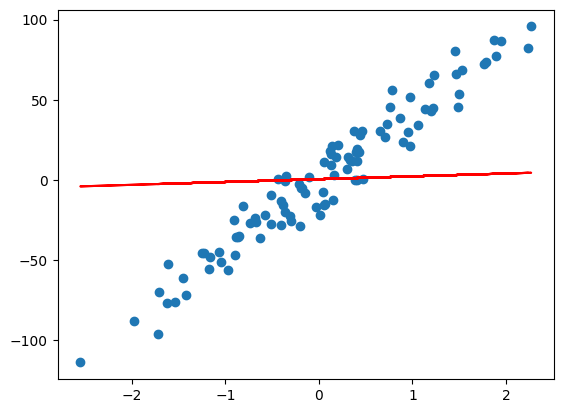

In [46]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

### 3. Fonction Cout : Erreur Quadratique moyenne

In [47]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [51]:
cost_function(X,y,theta)

905.6306841935502

### 4. Gradients et Descente de Gradient

In [52]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [53]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

### 5. Phase d'entrainement

In [75]:
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [77]:
theta_final

array([[42.61765864],
       [-0.81309274]])

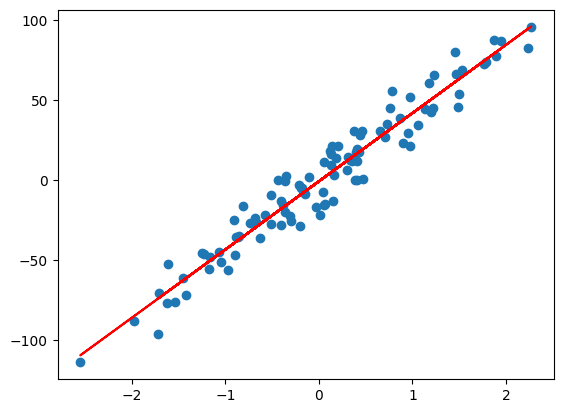

In [76]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [73]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [78]:
coef_determination(y,model(X,theta_final))

0.9417294706504984

In [ ]:
model